<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Javier Brito</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>


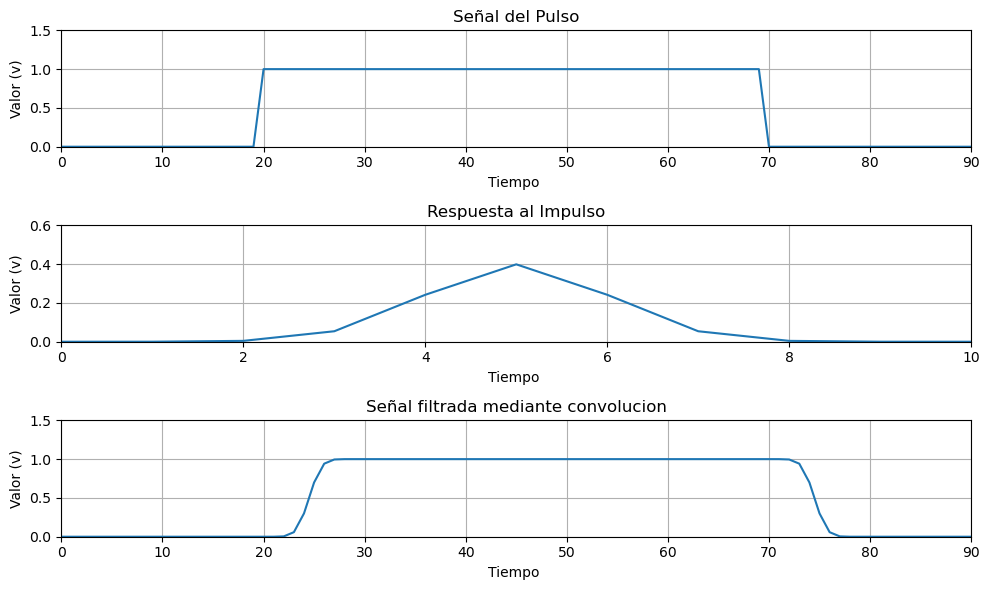

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def conv_analog(signal, resp):
    n = len(signal)## Se obtiene el largo de la señal.
    m = len(resp)## Se obtiene el largo de la respuesta impulso.
    conv = np.zeros(n + m - 1) ## Se crea un vector de zeros para almacenar la convolucion.
    for i in range(n): ## Itera sobre los indices de la señal a convolucionar.
        for j in range(m): ## Itera sobre los indices de la respuesta impulso.
            conv[i + j] += signal[i]*resp[j]## Operacion de convolucion para cada...
                                            ## ... elemento en la posicion [i][j].
                                            ## Luego se suma con el +=
    return conv

pulso = np.zeros(100) ## El pulso sera 0 en el dominio [1:19] ∧ [71:100]
pulso[20:70] = 1 ## Se crea el pulso el cual sera =1 en el domino de [20:70]

resp_impulso = np.exp(-(np.linspace(-5, 5, 11) ** 2) / 2)
resp_impulso /= np.sum(resp_impulso) ## Se crea la señal impulso.

conv_signal = conv_analog(pulso, resp_impulso) ## Se realiza la convolucion de ambas señales.

plt.figure(figsize=(10, 6))
plt.subplot(3,1,1)
plt.plot(pulso)
plt.title('Señal del Pulso')
plt.grid(True)
plt.xlim(0,90)
plt.ylim(0,1.5)
plt.xlabel('Tiempo ')
plt.ylabel('Valor (v)')

plt.subplot(3,1,2)
plt.plot(resp_impulso)
plt.title('Respuesta al Impulso')
plt.grid(True)
plt.xlim(0,10)
plt.ylim(0,0.6)
plt.xlabel('Tiempo ')
plt.ylabel('Valor (v)')

plt.subplot(3,1,3)
plt.plot(conv_signal)
plt.title('Señal filtrada mediante convolucion')
plt.grid(True)
plt.xlim(0,90)
plt.ylim(0,1.5)
plt.xlabel('Tiempo ')
plt.ylabel('Valor (v)')

plt.tight_layout()
plt.show()

## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


## 2.1 Obtencion de la señal original
* La ecuacion que define la señal es:
  $$ y = 0.6 \cdot \cos(x - 1.5)^2 + 1 \cdot \sin(x - 1.5) + 0.2 \cdot \cos((x - 1.5) \cdot 2) $$

## 2.2 Agregacion de ruido  
* Se le agrego ruido gaussiano a la señal para luego verificar el valor medio, el cual es solicitado por el apartado 2.3



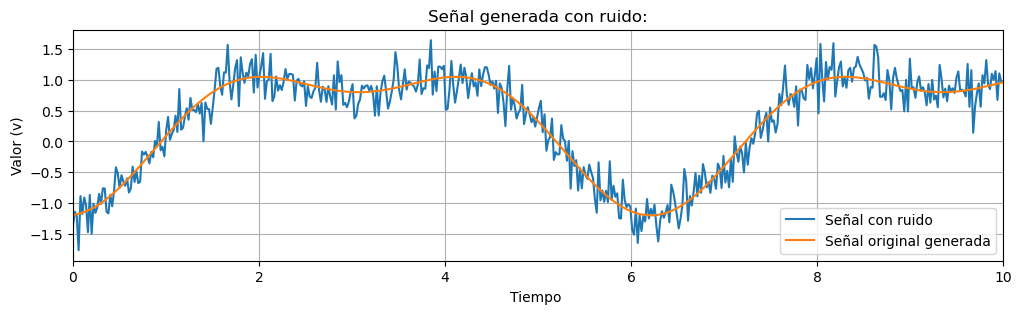

In [2]:
def signal(x):
    return 0.6*np.cos(x-1.5)**2+1*np.sin(x-1.5)+0.2*np.cos((x-1.5)*2)

def ruido_gaussiano(media, desviacion, tamaño_vector):## Reutilizacion del ruido gaussiano.
    ruido = np.zeros(tamaño_vector)
    for i in range(tamaño_vector[0]):
       ruido[i] = np.random.normal(media, desviacion)
    return ruido 

tvector2 = np.linspace(0,10,500)
o_signal = signal(tvector2)
ruido_gauss = ruido_gaussiano(0,0.5,(len(o_signal),1))
signal_noise = o_signal+0.5*ruido_gauss[:,0]

plt.figure(figsize=(12,3))
plt.plot(tvector2,signal_noise,label='Señal con ruido')
plt.plot(tvector2,o_signal,label='Señal original generada')
plt.title('Señal generada con ruido:')
plt.xlabel('Tiempo ')
plt.ylabel('Valor (v)')
plt.grid(True)
plt.xlim(0,10)
plt.legend()
plt.show()

## 2.3 Obtencion del valor medio de la señal con ruido

In [3]:
valor_medio = np.mean(signal_noise)
print("El valor medio de la señal con ruido es:", valor_medio)

El valor medio de la señal con ruido es: 0.3401355843284549


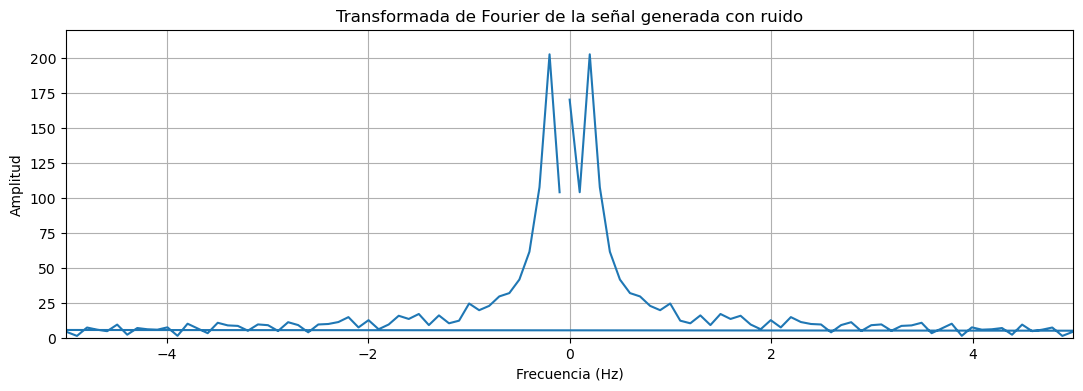

In [4]:
fft_signal = np.fft.fft(signal_noise) ## Se calcula la transformada de fourier en conjunto con sus frecuencias
freq_fft = np.fft.fftfreq(len(signal_noise), d=(tvector2[1]-tvector2[0]))

plt.figure(figsize=(13, 4))
plt.plot(freq_fft, np.abs(fft_signal))
plt.title('Transformada de Fourier de la señal generada con ruido')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.xlim(-5,5) 
plt.ylim(0, 220)
plt.show()

* Se puede visualizar el humbral donde se concentra la mayor informacion de la señal original, por lo que se creara un filtro que eliminara lo que este fuera del rango de valores entre [-2,2].

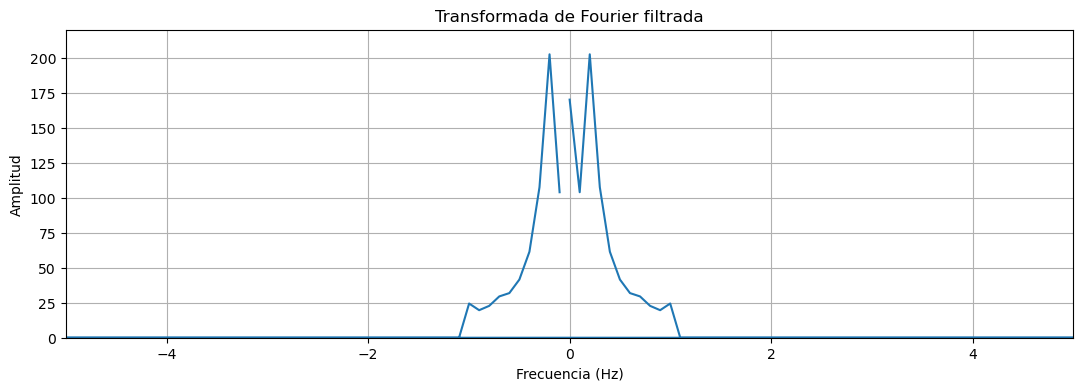

In [5]:
## Filtro pasa bajos en fft.
cutfreq = 1  ## Frecuencia de corte
fft_low = fft_signal.copy()  ## Se copia la señal original para filtrarla
fft_low[np.abs(freq_fft)>cutfreq] = 0  ## Se utiliza el filtro en el dominio de las frecuencias

plt.figure(figsize=(13, 4))
plt.plot(freq_fft, np.abs(fft_low))
plt.title('Transformada de Fourier filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.xlim(-5,5) 
plt.ylim(0, 220)
plt.show()


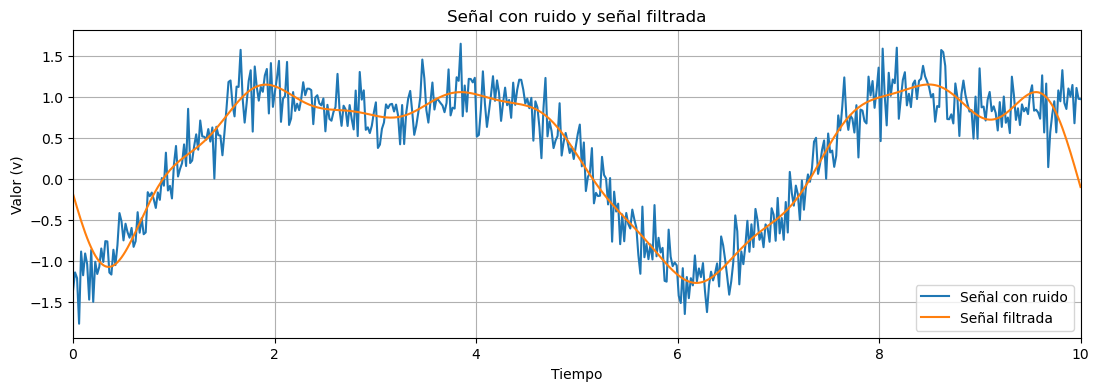

In [6]:
signal_filter_low = np.fft.ifft(fft_low).real ## Se hace la transformada inversa, luego se toma la parte real

plt.figure(figsize=(13, 4))
plt.plot(tvector2, signal_noise, label='Señal con ruido')
plt.plot(tvector2, signal_filter_low, label='Señal filtrada')
plt.title('Señal con ruido y señal filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Valor (v)')
plt.xlim(0,10)
plt.grid(True)
plt.legend()
plt.show()

* Comparacion de las señal original con la señal reconstruida:

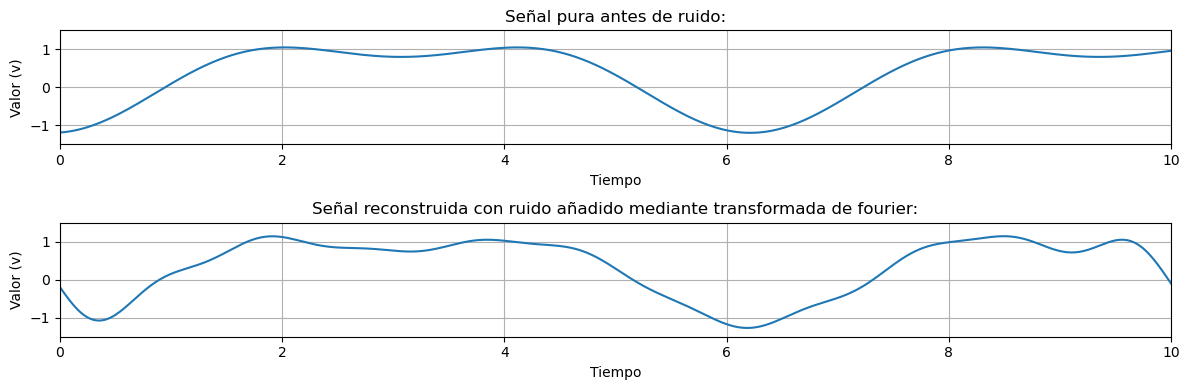

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)  
plt.plot(tvector2,o_signal)
plt.title('Señal pura antes de ruido:')
plt.xlabel('Tiempo')
plt.ylabel('Valor (v)')
plt.xlim(0,10)
plt.ylim(-1.5,1.5)
plt.grid(True)

plt.subplot(2, 1, 2)  
plt.plot(tvector2,signal_filter_low)
plt.title('Señal reconstruida con ruido añadido mediante transformada de fourier:')
plt.xlabel('Tiempo')
plt.ylabel('Valor (v)')
plt.xlim(0,10)
plt.ylim(-1.5,1.5)
plt.grid(True)

plt.tight_layout()
plt.show()

## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(t,miu,sigma):
    wavelet = 2/(np.power(np.pi,1/4)*np.sqrt(3*sigma))
    wavelet_exp = (1-((t-miu)/sigma)**2)*np.exp((-(t-miu)**2)/((2*(sigma**2))))
    wavelet_transform = wavelet*wavelet_exp
    return wavelet_transform

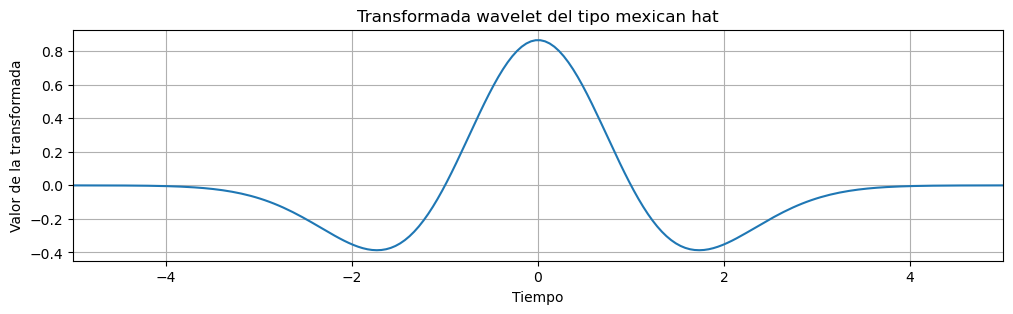

In [9]:
tvector=np.linspace(-5,5,200)
plt.figure(figsize=(12,3))
plt.plot(tvector,mexican_hat(tvector,0,1)) ## Definiendo miu como cero y sigma como 1
plt.title("Transformada wavelet del tipo mexican hat")
plt.ylabel("Valor de la transformada")
plt.xlabel("Tiempo")
plt.grid(True)
plt.xlim(-5,5)
plt.show()

### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$. 

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

* Primero se define la transformada discreta como funcion:

In [10]:
def dwt_analog(signal, wavelet): ## Transformada discreta de wavelet.
    n = len(signal)
    h_len = len(wavelet)
    # Extiende la señal en caso de que la transformada no sea una potencia de 2.
    if n % 2 != 0:
        signal = np.append(signal, [0])## En caso de que la señal no cumpla la condicion, se le agregaran ceros.
    ## Se realiza la convolucion entre la señal de entrada y la señal wavelet.
    coef_low_freq = np.convolve(signal, wavelet[::-1], mode='same')  ## El argumento 'same' indica que la convolucion tendra el mismo largo...
    coef_high_freq = np.convolve(signal, np.array([(-1)**i*c for i, c in enumerate(wavelet[::-1])]), mode='same')##...que la señal de entrada.
    ## Estas lineas ayudan a submuestrear los coeficientes de la transformada.
    coef_low_freq = coef_low_freq[::2]
    coef_high_freq = coef_high_freq[::2]
    return coef_low_freq, coef_high_freq

* Luego se define la señal a transformar y su respectiva funcion wavelet:

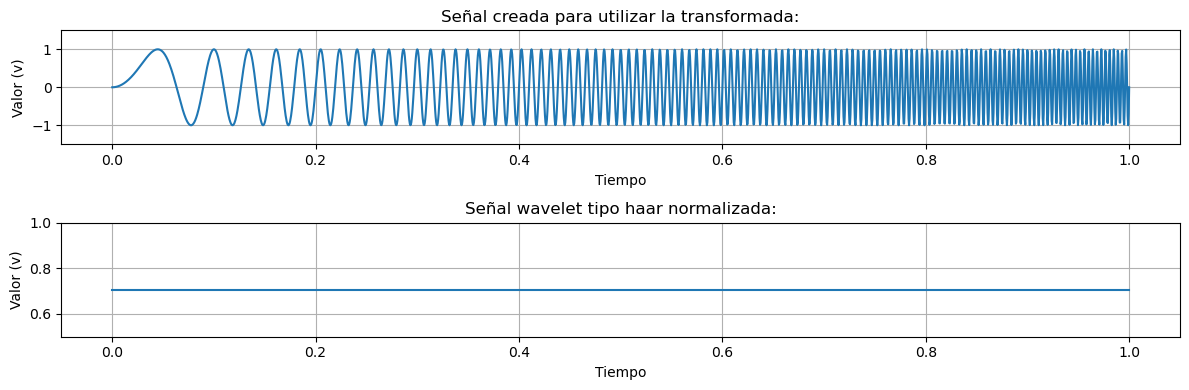

In [11]:
## Se define un wavelet del tipo 'haar', la cual es muy parecida a una funcion escalon.
haar_wavelet = np.array([1, 1]) / np.sqrt(2)
x_wavelet = np.arange(len(haar_wavelet)) ## Este comando se utilizara solamente para mostrar... 
                                         ## ...la forma de la onda en un plot.
x = np.linspace(0, 1, num=2048)
signal_example = np.sin(250 * np.pi * x**2) ## Se define una funcion para aplicar la transformada
data = signal_example

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)  
plt.plot(x,signal_example)
plt.title('Señal creada para utilizar la transformada:')
plt.xlabel('Tiempo')
plt.ylabel('Valor (v)')
plt.ylim(-1.5,1.5)
plt.grid(True)

plt.subplot(2, 1, 2)  
plt.plot(x_wavelet,haar_wavelet)
plt.title('Señal wavelet tipo haar normalizada:')
plt.xlabel('Tiempo')
plt.ylabel('Valor (v)')
plt.ylim(0.5,1)
plt.grid(True)

plt.tight_layout()
plt.show()

* Por ultimo se muestra el grafico de los distintos niveles y coeficientes de la transformada, en este caso se grafico un nivel adicional a la transformada:

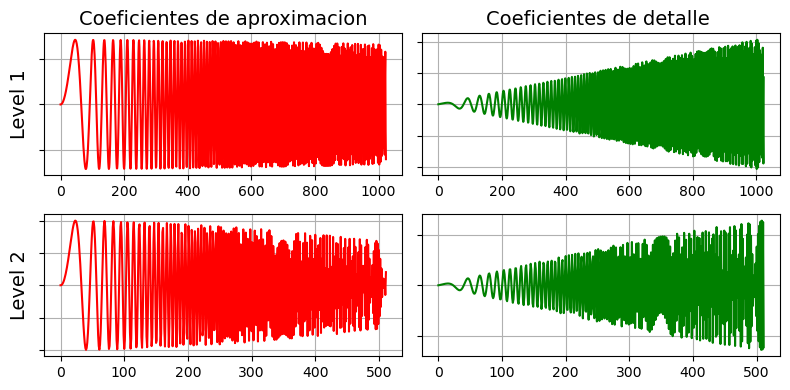

In [12]:
num_levels = 2  ## Corresponde al numero de niveles que se quiera lograr con la transformada.
## Se reutilizo este bloque de codigo para mostrar los niveles de la transformada.
## Unicamente se le añadio la funcion de elegir el numero de niveles con num_levels y se le agrego la cuadricula al plot
fig, axarr = plt.subplots(nrows=num_levels, ncols=2, figsize=(8, 4))
for i in range(num_levels):
    approx, detail = dwt_analog(data, haar_wavelet)
    axarr[i, 0].plot(approx, 'r')
    axarr[i, 1].plot(detail, 'g')
    axarr[i, 0].set_ylabel("Level {}".format(i + 1), fontsize=14, rotation=90)
    axarr[i, 0].set_yticklabels([])
    if i == 0:
        axarr[i, 0].set_title("Coeficientes de aproximacion", fontsize=14)
        axarr[i, 1].set_title("Coeficientes de detalle ", fontsize=14)
    axarr[i, 1].set_yticklabels([])
    data = approx

    axarr[i, 0].grid(True)
    axarr[i, 1].grid(True)

plt.tight_layout()
plt.show()

###  3.2.1. Explica el siguiente fragmento de código en detalle

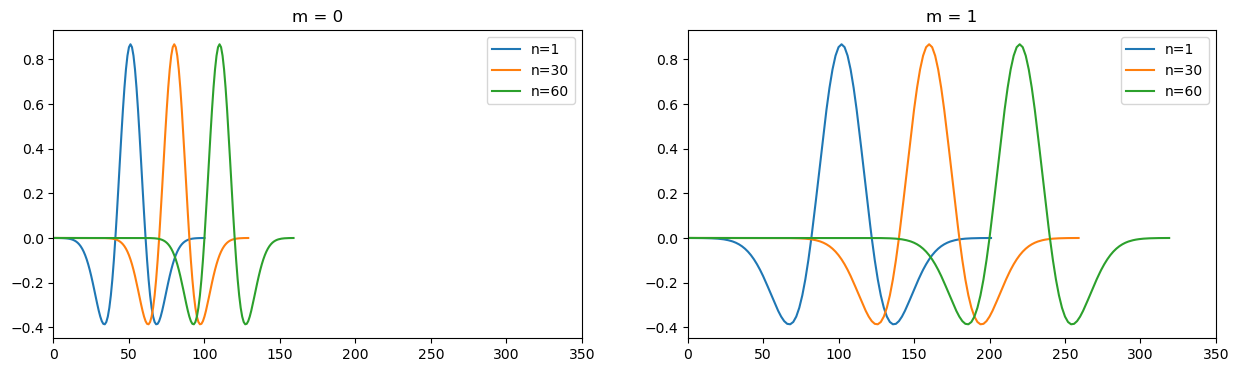

In [13]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet

def psi_mn(psi, m, n): ## Se define una funcion para realizar la transformada
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    ## np.interp , este comando sirve para interpolar par aumentar la logitud en un factor de "a"
    return wav ## Al llamar a la funcion retornara lo guardado en la variable wav.

psi = mexican_hat(np.arange(-5,5,0.1),0,1) ## Se llama a la funcion de la transformada 
xlim = (0,350)   ## Los parametros que se utilizaran para xlim, desde 0 a 350
ns = [1, 30, 60] ## Vector de valores ns y ms
ms = [0, 1] 
plt.figure(figsize=(15,4))## Define el tamaño de los graficos
plt.subplot(121) ## Se crea un subplot de matriz 1x2
                 ## subplot(nmp), donde n=filas, m=columans, p=posicion en la matriz.
for mi in range(len(ms)):
    m = ms[mi]                 ## indexa en ms
    plt.subplot(1,len(ms),mi+1)## Define la cantidad de de subplots, crea la matriz de dimensiones (1 x large).
    for n in ns:               ## donde large representa el largo del vector ms. 
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))## Agrega  las curvas a traves del for.
    plt.title("m = "+str(m)) ## Agrega el titulo al grafico.
    plt.legend(loc="best")   ## Agrega el nombre best a las variables.
    plt.xlim(xlim)           ## Limita el eje x dados los valores del xlim.
plt.show()

### 3.2.2 completa el siguiente código para realizar la transformada


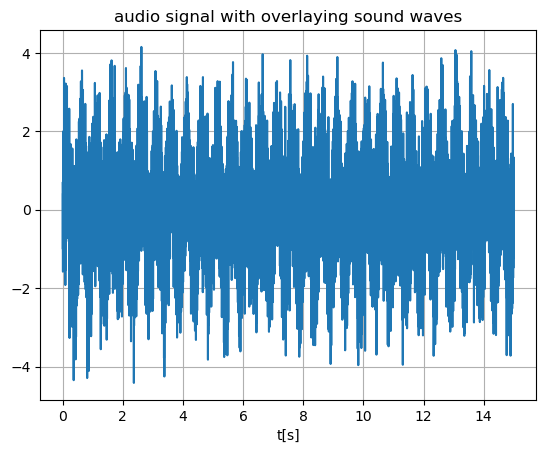

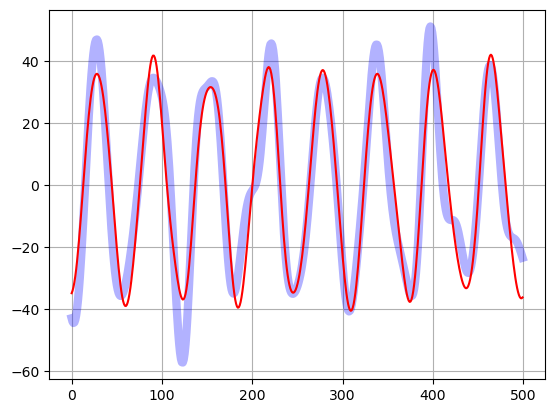

In [14]:
"""Transformed considering the sum over the section under study"""
def twav_mn(f, psi, m, n):
    f_scaled = f[::2**m]  # Escalamos la señal de audio según m
    transform_scaled = 2**(m/2.0)*np.sum(f_scaled[n:n+len(psi)]*psi)  # Escalamos la transformada por 2^(m/2)
    return transform_scaled
"""Naive Transform adding over the whole length"""
def twav_mn_naive(f, psi, m, n):
    pmn = psi_mn(psi,m,n)
    transform = 2**(-m/2.0)*np.sum(f[:len(pmn)]*pmn)
    return transform
    
m = 3 #single value for m
ns = np.arange(1000,1500)
res=1000 #resolution
freq=2 #frequency
"""Creating a wave to analyse"""
x = np.arange(0,15000,1) # Produces [0, 100) with steps of 2.
noise = np.random.normal(0,1, len(x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
#adding noise
audio=np.sin(np.arange(15000)*2*np.pi*freq/res)+noise


transformed_sweept=[twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept=[twav_mn_naive(audio, psi, m, n) for n in ns]

plt.plot(np.arange(len(audio),dtype="float32")/res,audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.grid(True)
plt.show()



plt.plot(transformed_sweept,color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.grid(True)
plt.show()

### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño. 

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia. 
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

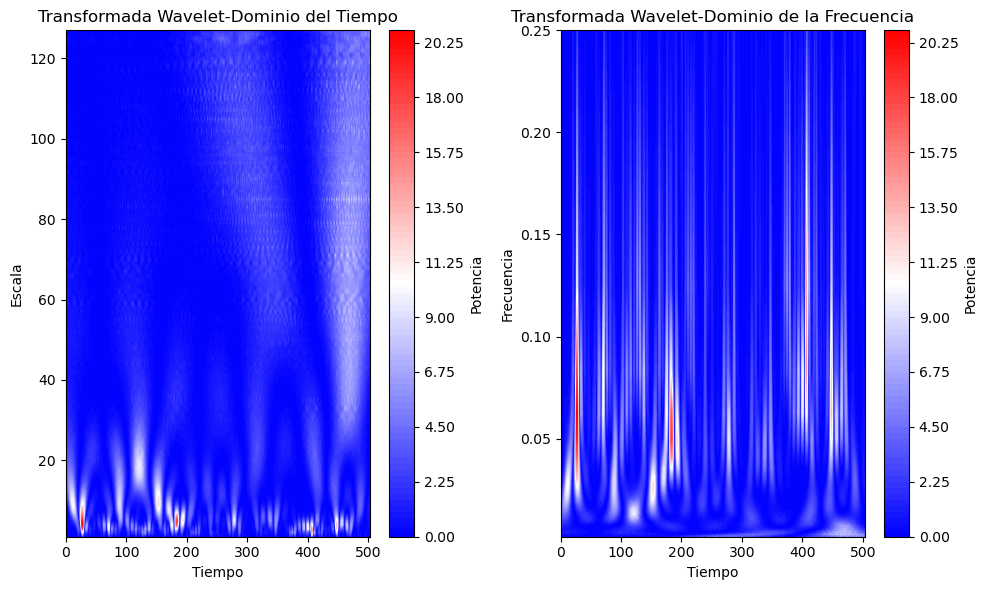

In [15]:
import pywt

url = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
data = np.loadtxt(url)    ## Se cargan los datos de la pagina en data

wavelet_type = 'mexh'     ## Se define el tipo de onda mediante la libreria pywt
scales = np.arange(1, 128)## Vector de 1 a 128
coef, freq = pywt.cwt(data, scales, wavelet_type)
## coef, freq = pywt.cwt(data,scale,wavelet)  // Comando explicacion:
## Donde data = datos a aplicar la transformada
##       scale = escala de la transformada, cuanto mas grande se esta,
##            ...mas baja sera la frecuencia que se puede detectar.
##       wavelet = se refiere a la forma de la onda a utilizar

power = (np.abs(coef))**2 ## Se calcula la potencia de los coeficientes.

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.contourf(np.arange(len(data)), scales, power, cmap='bwr', levels=100)
plt.colorbar(label='Potencia')
plt.xlabel('Tiempo')
plt.ylabel('Escala')
plt.title('Transformada Wavelet-Dominio del Tiempo')

plt.subplot(1, 2, 2)
plt.contourf(np.arange(len(data)), freq, power, cmap='bwr', levels=100)
plt.colorbar(label='Potencia')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.title('Transformada Wavelet-Dominio de la Frecuencia')

plt.tight_layout()
plt.show()

### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

* Se puede notar que en las zonas donde hay mas rojo, existe una mayor concentracion de datos.
  
* Tambien cabe destacar que se probaron distintas formas de onda wavelet para el analisis de estos datos, cada una mostraba un espectro distinto. Algunas formas de onda madre pueden ser mas sensibles a tipos de patrones presentes en los datos, siendo asi algunas wavelet mas adecuadas dependiendo del fenomeno involucrado de interes.
* Con respecto a los graficos, se puede inferir las caracteristicas temporales y con cuanta perioricidad se presentan patrones en la distribucion de los datos, esto brinda informacion fundamental para el analisis de datos. 


## 4. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/